In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from operator import itemgetter
from nltk.tokenize import TweetTokenizer

In [30]:
stoplist = set([line.replace("\n","") for line in open('/Users/alinamazi/Data/stopword-list2.txt')])
pun = [',', '-','.', ':', '(', ')', '--', ';', '...', '?','today','follow','stats','can', 'say', 'says', 'will','may', 'must', 'us', 'via','a','the', 'rt', 'gg', 'gt', 'lt', 'la', 'de', 'te', 'lol', 'follow', 'followers', 'unfollow', 'unfollowers', 'unfollower', 'follower']

with open('/Users/alinamazi/Data/common_list.txt','rt') as myfile:
    common_word = myfile.read().splitlines()


In [31]:
#import json as simplejson
import json
#tweets_data_file = open('/Users/alinamazi/Data/results/04_11/Exp2_3h/ua.json','r')
tweets_data_file = open('/Users/alinamazi/Data/results/04_11_14/Exp1/ua.json','r')

tweet_data = json.load(tweets_data_file)
com = defaultdict(lambda : defaultdict(int))


In [32]:
len(tweet_data['tweets'])

14393

In [33]:
tweet_data['tweets'][0]['text']

u'RT @porchpile: The #united videos are amazing cultural milestone: public servants committing violence on paying customers on behalf of corp\u2026'

In [7]:
search_word = 'united'
print("Co-occurrence for %s:" % search_word)
print(count_search.most_common(20))

Co-occurrence for obama:


NameError: name 'count_search' is not defined

In [34]:
##changing to data frame PANDAS and do some analysis

tweets = pd.DataFrame()

In [41]:
tweets['text'] = map(lambda tweet: tweet['text'], tweet_data['tweets'])
tweets['lang'] = map(lambda tweet: tweet['lang'], tweet_data['tweets'])
tweets['geo'] = map(lambda tweet: tweet['geo'], tweet_data['tweets'])
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweet_data['tweets'])
tweets['location'] = map(lambda tweet: tweet['user']['location'] if tweet['user'] != None else None, tweet_data['tweets'])

In [36]:
len(tweets['lang'])

14393

In [46]:
tweets

,text,lang,country,location,geo
0,RT @porchpile: The #united videos are amazing ...,en,None,None,None
1,RT @JosephAlani: This is the best response I'v...,en,None,weyland-yutani,None
2,RT @FlokiUSA: .@united just saw the tragic vid...,en,None,None,None
3,@KiranManral @united I know 😥 sad times we li...,en,None,Chennai,None
4,RT @JayseDavid: @United overbook #flight3411 a...,en,None,None,None
5,RT @JohnTheCho: It's hard not to see a connect...,en,None,None,None
6,RT @Pornhub: . @united You are literally the m...,en,None,Aureum,None
7,RT @ReaganBattalion: This is a doctor who paid...,en,None,NM,None
8,@adamvanho @RyanRuggiero @TVTye @united They n...,en,None,"Cañada, España",None
9,RT @kaylyn_davis: #flythefriendlyskies @united...,en,None,Los Gatos,None


In [44]:
#tweets['geo']

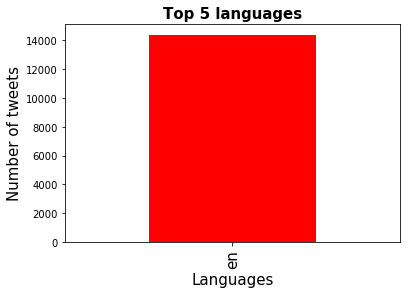

In [37]:
tweets_by_lang = tweets['lang'].value_counts()

%matplotlib inline

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [118]:
tweets_by_lang

en    63059
Name: lang, dtype: int64

In [38]:
%matplotlib inline

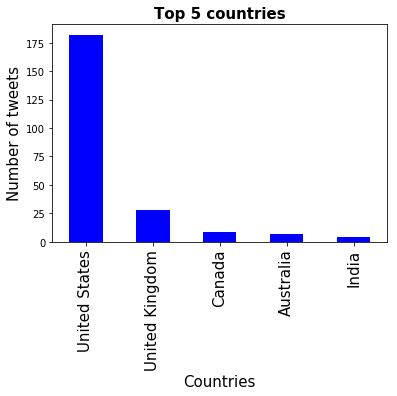

In [39]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

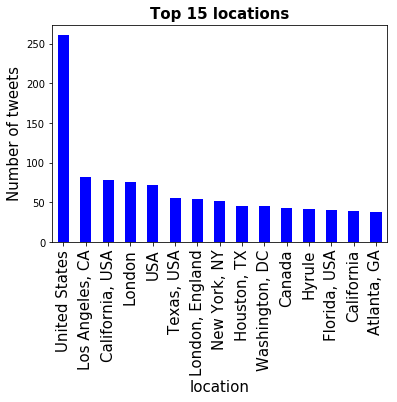

In [40]:
tweets_by_country = tweets['location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 15 locations', fontsize=15, fontweight='bold')
tweets_by_country[:15].plot(ax=ax, kind='bar', color='blue')

In [27]:
type(tweets_by_country)

pandas.core.series.Series

In [115]:
type(tweets)

pandas.core.frame.DataFrame

In [116]:
tweets

,text,lang,country
0,Henry Ferrera Women's Rubber Slip-on Rain Shoe...,en,None
1,Play Runescape almost 8 years as a good standi...,en,None
2,Deleted the tweet about it?,en,None
3,"RT @HeyItsTifanny: ""@UNDRESSINGNATE: quote thi...",en,None
4,It's hard to like Robert Mugabe supporting Oba...,en,None
5,RT @connectegrate: Digital transformation and ...,en,None
6,"Well, no one is going to do this.",en,None
7,RT @psfn: Want to relive last week's PSFN? Che...,en,None
8,staying up talking to that special someone fee...,en,None
9,RT @THOUGHTTFULMIND: “I think we were meant to...,en,None
